In [ ]:
#Library untuk pengelolahan data
import pandas as pd
import numpy as np

#Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk model Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()


Saving Case Study - Customer.csv to Case Study - Customer.csv
Saving Case Study - Product.csv to Case Study - Product.csv
Saving Case Study - Store.csv to Case Study - Store.csv
Saving Case Study - Transaction.csv to Case Study - Transaction.csv


In [ ]:
#Data Input
customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
product = pd.read_csv('Case Study - Product.csv', delimiter=';')
store = pd.read_csv('Case Study - Store.csv', delimiter=';')
transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


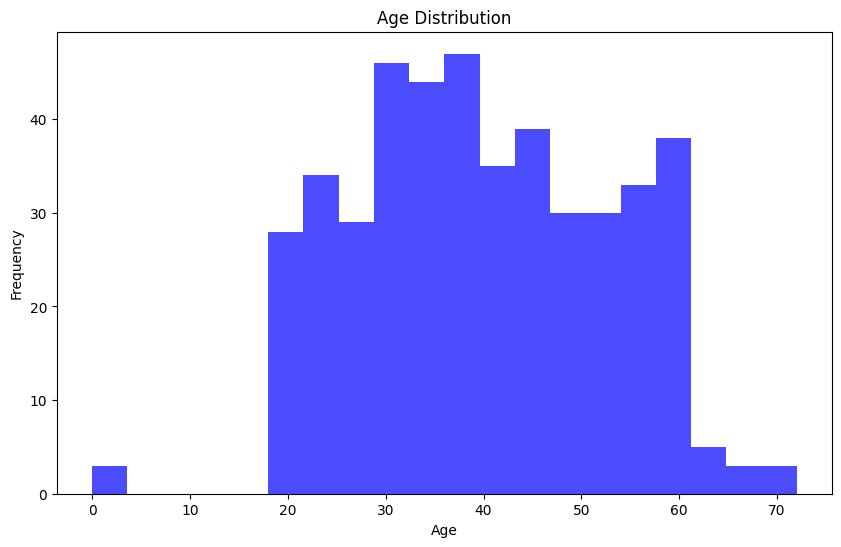

In [ ]:
#check if age values are reasonable
plt.figure(figsize=(10, 6))
plt.hist(customer['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Data Cleansing
# Check for missing values
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [ ]:
store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [ ]:
customer = customer.dropna(subset=['Marital Status'])
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [ ]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [ ]:
#Groupped all the data into one

# Merge customer and transaction data on CustomerID
merged_customer_transaction = pd.merge(customer, transaction, on='CustomerID', how='inner')

# Merge product and transaction data on ProductID
merged_product_transaction = pd.merge(product, transaction, on='ProductID', how='inner')

# Merge store and transaction data on StoreID
merged_store_transaction = pd.merge(store, transaction, on='StoreID', how='inner')

# Finally, merge all previously merged dataframes based on TransactionID
final_merged_data = pd.merge(merged_customer_transaction, merged_product_transaction, on='TransactionID', how='inner')
final_merged_data = pd.merge(final_merged_data, merged_store_transaction, on='TransactionID', how='inner')

final_merged_data.head()

<ipython-input-17-493e3979768a>:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Price_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_merged_data = pd.merge(final_merged_data, merged_store_transaction, on='TransactionID', how='inner')


,CustomerID_x,Age,Gender,Marital Status,Income,TransactionID,Date_x,ProductID_x,Price_x,Qty_x,...,GroupStore,Type,Latitude,Longitude,CustomerID,Date,ProductID,Price_y,Qty,TotalAmount
0,1,55,1,Married,"5,12",TR54475,2022-02-23,P8,16000,1,...,Lingga,Modern Trade,"-3,654703","128,190643",1,2022-02-23,P8,16000,1,16000
1,1,55,1,Married,"5,12",TR44292,2022-05-05,P3,7500,4,...,Prima,Modern Trade,"-6,2","106,816666",1,2022-05-05,P3,7500,4,30000
2,1,55,1,Married,"5,12",TR7576,2022-05-06,P7,9400,2,...,Prima,Modern Trade,"-6,914864","107,608238",1,2022-05-06,P7,9400,2,18800
3,1,55,1,Married,"5,12",TR2162,2022-06-03,P10,15000,4,...,Priangan,Modern Trade,"-5,45","105,26667",1,2022-06-03,P10,15000,4,60000
4,1,55,1,Married,"5,12",TR14167,2022-06-24,P1,8800,7,...,Prima,Modern Trade,"-6,914864","107,608238",1,2022-06-24,P1,8800,7,61600


In [ ]:
final_merged_data.isna().sum()

CustomerID_x      0
Age               0
Gender            0
Marital Status    0
Income            0
TransactionID     0
Date_x            0
ProductID_x       0
Price_x           0
Qty_x             0
TotalAmount_x     0
StoreID_x         0
ProductID_y       0
Product Name      0
Price_x           0
CustomerID_y      0
Date_y            0
Price_y           0
Qty_y             0
TotalAmount_y     0
StoreID_y         0
StoreID           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
CustomerID        0
Date              0
ProductID         0
Price_y           0
Qty               0
TotalAmount       0
dtype: int64

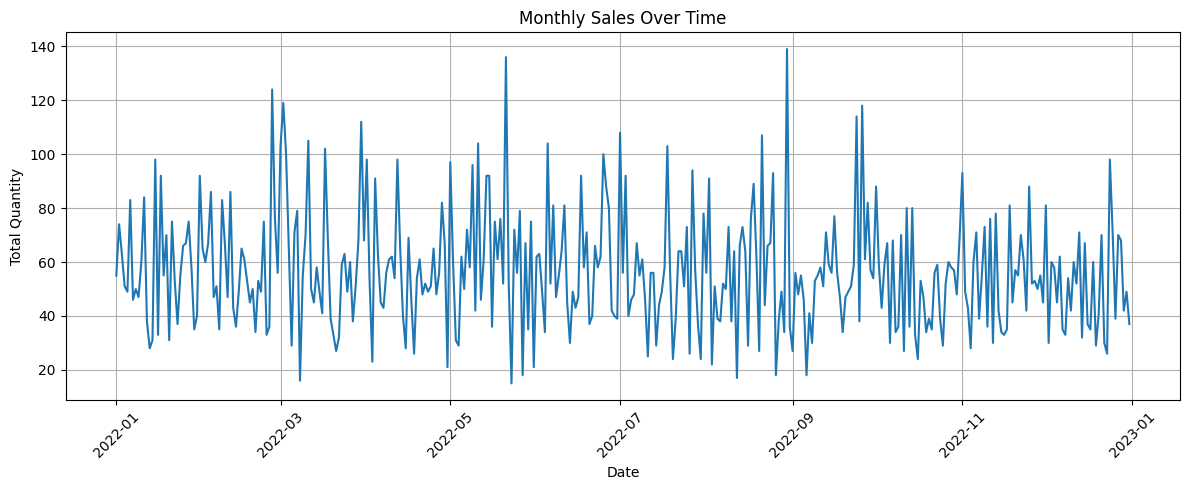

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import mean_squared_error

daily_sales = final_merged_data.groupby('Date')[['Qty']].sum()

daily_sales.index = pd.to_datetime(daily_sales.index, format='%d/%m/%Y', dayfirst=True)

# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, linestyle='-', label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from math import sqrt
from matplotlib import pyplot

X = daily_sales['Qty'].values
train_size = int(len(X))
train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[-train_size:]
arima_model = pm.auto_arima(train, seasonal=False, stepwise=False, suppress_warnings=True, trace=True)
arima_model.summary()

best_order = arima_model.order


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3556.298, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3434.524, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3393.310, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3349.269, Time=0.23 sec
 ARI

365


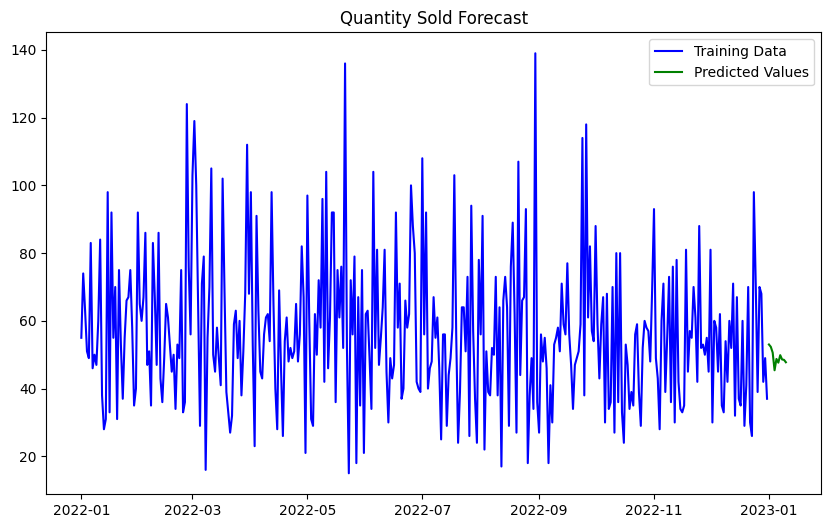

In [ ]:
forecast_period = test.shape[0]
print(forecast_period)
forecast = arima_model.predict(steps=forecast_period)
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_period)
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['qty'])

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Qty'], color='blue', label='Training Data')
plt.plot(forecast.index, forecast, color='green', label='Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Reference : https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
X = daily_sales.values
size = int(len(X))
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order = best_order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


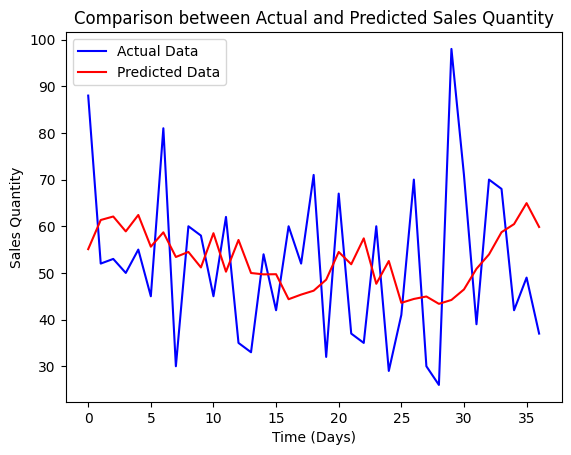

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test, color= 'blue', label = 'Actual Data')
pyplot.plot(predictions, color='red', label = 'Predicted Data')
pyplot.xlabel('Time (Days)')
pyplot.ylabel('Sales Quantity')
pyplot.legend()
pyplot.title('Comparison between Actual and Predicted Sales Quantity')
pyplot.show()

In [ ]:
# Evaluate the Mean Square Error
mse = sqrt(mean_squared_error(test, predictions))
print('Mean Squared Error: %.3f' % mse)

Mean Squared Error: 22.630


In [ ]:
# Intercept and coeff of the line
print('AR Parameters:', model_fit.arparams)
print('MA Parameters:', model_fit.maparams)


AR Parameters: [-0.5362407]
MA Parameters: []
